# Addressing "Spikes" in BOTPT Instruments Preceding Junction Box Changes during July 2018 Cruise

**Haley Cabaniss** with significant help from Bill Chadwick, Zach Billings, Sage Lichtenwainer, and Liana Vaccari

Bill Chadwick recently noticed spikes in BOTPT data for 3 of the instruments on the cabled array. He notified Dana Manalung, who attributed the spikes to a grounding problem in the junction boxes. During a recent cruise (early July 2018) the junction boxes were changed and the 3 BOTPT instruments (MJ03B, MJ03B, MJ03F) were grounded using an alternatitve method. Bill Chadwick noted the following changes in response to the J-box swap:

| **Platform** | Reference Designator | Data Quality Following J-Box Swap
| -- | -- |
|Central Caldera | RS03CCAL-MJ03F-05-BOTPTA301 | There were no spikes before, and no spikes after |
| International District Vent Site 2 | RS03INT2-MJ03D-06-BOTPTA303 | there was a HUGE reduction of spikes, from many to none |
|ASHES Vent Field | RS03ASHS-MJ03B-09-BOTPTA304 | there was a large reduction of the number of spikes following the J-box swap, though a few remain |
|Eastern Caldera | RS03ECAL-MJ03E-06-BOTPTA302 | No J-Box Swap |



The purpose of this work is to describe the nature of the data spikes preceding the recent junction-box swaps and to identify potential solutions for removing bad data from the existing BOTPT datasets. Our filtering method removes the spikes from the data and only sacrifices 10 seconds worth of data surrounding each spike.

In [0]:
USERNAME = ''
TOKEN =  ''

In [0]:
import xarray as xr
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns # package for nice plotting defaults
# sns.set()

# Plot Data for Station MJ03F (Central Caldera)
Station MJ03F is the Central Caldera BOTPT instrument which has exhibited no spikes before or after the junction box change.

The instrument appears to go offline on **July 5, 2018 just before 05:15:00** and comes back online July 6, 2018 just after 05:20:00. I have interpreted this data gap as the time in which the junction box was changed for instrument MJ03F. The following figures assess the data quality both before and after the J-box swap.

In [0]:
single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/cabanis2@illinois.edu/20180718T150224-RS03CCAL-MJ03F-05-BOTPTA301-streamed-botpt_nano_sample/deployment0001_RS03CCAL-MJ03F-05-BOTPTA301-streamed-botpt_nano_sample_20180701T000000-20180706T235959.950000.nc'

# Load the data files
ds = xr.open_dataset(single_file)

# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds = ds.swap_dims({'obs': 'time'})

# Convert psi to depth
ds_psi = np.array(ds['bottom_pressure'])
ds_time = np.array(ds['time'])
ds_depth=np.multiply(ds_psi,-.67)

ds_depth[1:10]

array([-1511.254 , -1511.2543, -1511.2548, -1511.255 , -1511.2548,
       -1511.2543, -1511.2544, -1511.2545, -1511.2545], dtype=float32)

Text(0,0.5,'Depth [m]')

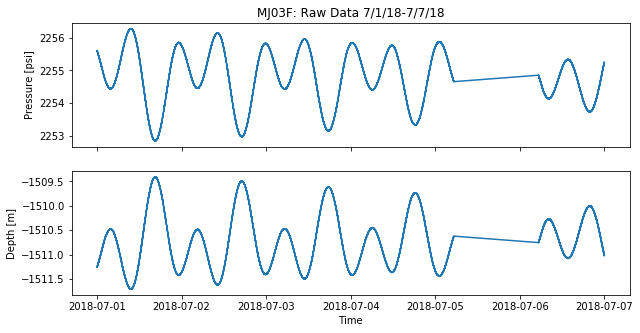

In [0]:
# MJ03F: Plot the Complete Raw Dataset
fig1, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds_time,ds_psi)
ax1.set_title('MJ03F: Raw Data 7/1/18-7/7/18')
ax1.set_ylabel('Pressure [psi]')
ax2.plot(ds_time,ds_depth)
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')

Text(0,0.5,'Pressure [psi]')

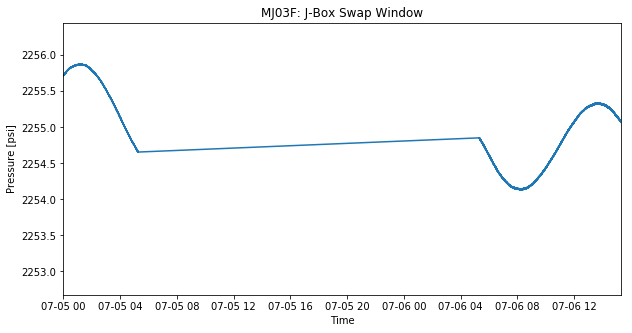

In [0]:
# MJ03F: Plot to Determine time of data gap (J-Box Swap?) 
fig2, (ax) = plt.subplots(figsize=(10,5))
ax.plot(ds_time,ds_psi)
ax.set_xlim('2018-07-05 00:00:00','2018-07-06 15:20:00')
ax.set_title('MJ03F: J-Box Swap Window')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure [psi]')

# The instrument appears to go offline on July 5, 2018 just before 05:15:00 and comes back online July 6, 2018 just after 05:20:00.

Text(0.5,0,'time')

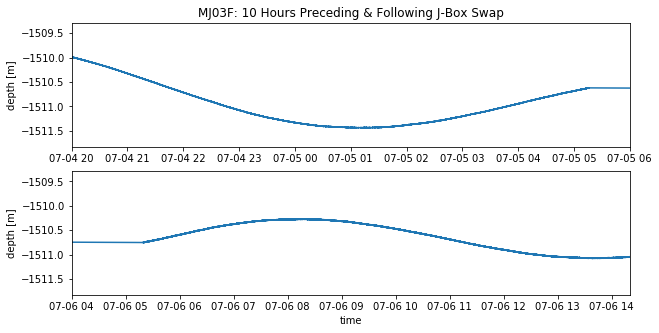

In [0]:
# MJ03F: Plot 10 hours before and after the J-Box swap

fig3, (ax1,ax2) = plt.subplots(2,1, sharex=False, figsize=(10,5))
ax1.plot(ds_time,ds_depth)
ax2.plot(ds_time,ds_depth)
ax1.set_xlim('2018-07-04 20:00:00','2018-07-05 06:00:00')
ax2.set_xlim('2018-07-06 04:00:00','2018-07-06 14:20:00')
ax1.set_title('MJ03F: 10 Hours Preceding & Following J-Box Swap')
ax1.set_ylabel('depth [m]')
ax2.set_ylabel('depth [m]')
ax2.set_xlabel('time')

Text(0,0.5,'Depth [m]')

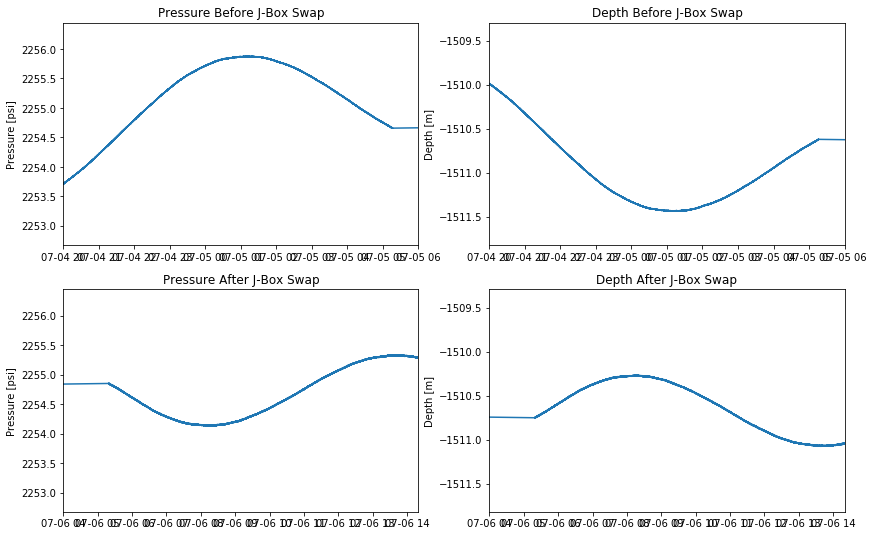

In [0]:
# MJ03F: Comparison Plot for 10 hours preceding/following J-Box Swap
fig4, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))#, sharey='row')
ax1.plot(ds_time, ds_psi)
ax1.set_xlim('2018-07-04 20:00:00','2018-07-05 06:00:00')
ax1.set_title('Pressure Before J-Box Swap')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(ds_time,ds_psi)
ax3.set_xlim('2018-07-06 04:00:00','2018-07-06 14:20:00')
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After J-Box Swap')
ax2.plot(ds_time,ds_depth)
ax2.set_xlim('2018-07-04 20:00:00','2018-07-05 06:00:00')
ax2.set_title('Depth Before J-Box Swap')
ax2.set_ylabel('Depth [m]')
ax4.plot(ds_time,ds_depth)
ax4.set_xlim('2018-07-06 04:00:00','2018-07-06 14:20:00')
ax4.set_title('Depth After J-Box Swap')
ax4.set_ylabel('Depth [m]')

# Plot Data for Station MJ03D (International District Vent Site II)
Station MJ03D is the International District Vent Site II BOTPT instrument which exhibited a huge reduction in spikes (from many to none) following the junction box change. 

The instrument appears to go offline on July 4, 2018 just after 08:00:00 and comes back online July 6, 2018 just after 02:00:00. I have interpreted this data gap as the time in which the junction box was changed for instrument MJ03D.

In [0]:
single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/cabanis2@illinois.edu/20180718T145812-RS03INT2-MJ03D-06-BOTPTA303-streamed-botpt_nano_sample/deployment0001_RS03INT2-MJ03D-06-BOTPTA303-streamed-botpt_nano_sample_20180701T000000-20180706T235959.950000.nc'

In [0]:
import xarray as xr
import numpy as np

single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/cabanis2@illinois.edu/20180718T145812-RS03INT2-MJ03D-06-BOTPTA303-streamed-botpt_nano_sample/deployment0001_RS03INT2-MJ03D-06-BOTPTA303-streamed-botpt_nano_sample_20180701T000000-20180706T235959.950000.nc'
# Load the data files
ds2 = xr.open_dataset(single_file)

#By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds2 = ds2.swap_dims({'obs': 'time'})

# Convert psi to depth
ds2_psi = np.array(ds2['bottom_pressure'])
ds2_time = np.array(ds2['time'])
ds2_depth=np.multiply(ds2_psi,-.67)

ds2_depth[1:10]

array([-1513.7437, -1513.7435, -1513.7461, -1513.7445, -1513.7443,
       -1513.7437, -1513.7445, -1513.746 , -1513.7426], dtype=float32)

Text(0,0.5,'Depth [m]')

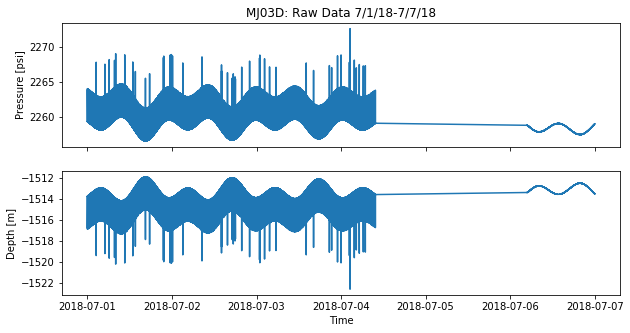

In [0]:
# MJ03D: Plot the Complete Raw Dataset
fig5, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds2_time,ds2_psi)
ax1.set_title('MJ03D: Raw Data 7/1/18-7/7/18')
ax1.set_ylabel('Pressure [psi]')
ax2.plot(ds2_time,ds2_depth)
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')

Text(0,0.5,'Pressure [psi]')

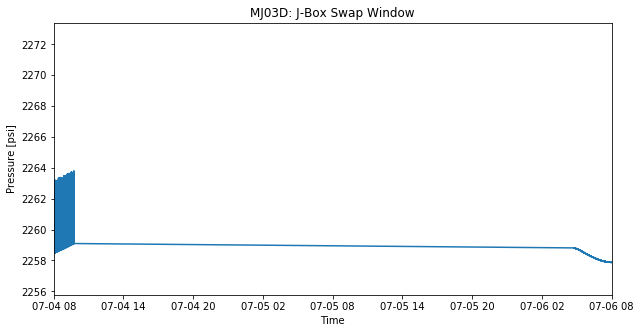

In [0]:
# MJ03D: Plot to Determine time of data gap (J-Box Swap?) 
fig6, (ax) = plt.subplots(figsize=(10,5))
ax.plot(ds2_time,ds2_psi)
ax.set_xlim('2018-07-04 08:00:00','2018-07-06 08:00:00')
ax.set_title('MJ03D: J-Box Swap Window')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure [psi]')

# The instrument appears to go offline on July 4, 2018 just after 08:00:00 and comes back online July 6, 2018 just after 02:00:00.

Text(0.5,0,'time')

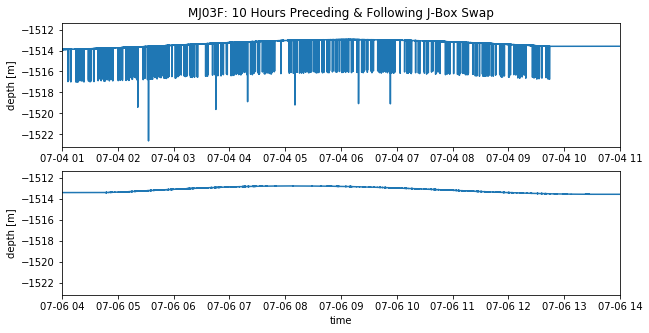

In [0]:
# MJ03D: Plot 10 hours before and after the J-Box swap

fig7, (ax1,ax2) = plt.subplots(2,1, sharex=False, figsize=(10,5))
ax1.plot(ds2_time,ds2_depth)
ax2.plot(ds2_time,ds2_depth)
ax1.set_xlim('2018-07-04 01:00:00','2018-07-04 11:00:00')
ax2.set_xlim('2018-07-06 04:00:00','2018-07-06 14:00:00')
ax1.set_title('MJ03F: 10 Hours Preceding & Following J-Box Swap')
ax1.set_ylabel('depth [m]')
ax2.set_ylabel('depth [m]')
ax2.set_xlabel('time')

Text(0,0.5,'Depth [m]')

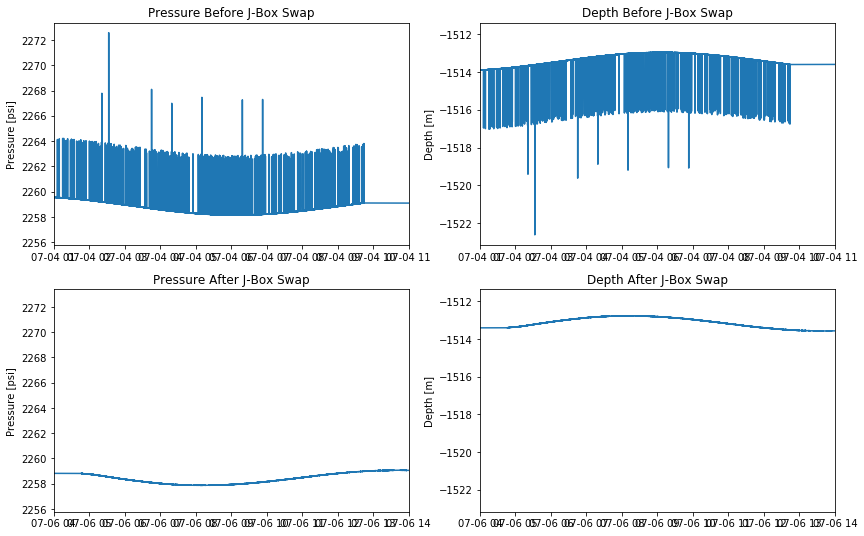

In [0]:
# MJ03D: Comparison Plot for 10 hours preceding/following J-Box Swap
fig8, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))#, sharey='row')
ax1.plot(ds2_time, ds2_psi)
ax1.set_xlim('2018-07-04 01:00:00','2018-07-04 11:00:00')
ax1.set_title('Pressure Before J-Box Swap')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(ds2_time,ds2_psi)
ax3.set_xlim('2018-07-06 04:00:00','2018-07-06 14:00:00')
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After J-Box Swap')
ax2.plot(ds2_time,ds2_depth)
ax2.set_xlim('2018-07-04 01:00:00','2018-07-04 11:00:00')
ax2.set_title('Depth Before J-Box Swap')
ax2.set_ylabel('Depth [m]')
ax4.plot(ds2_time,ds2_depth)
ax4.set_xlim('2018-07-06 04:00:00','2018-07-06 14:00:00')
ax4.set_title('Depth After J-Box Swap')
ax4.set_ylabel('Depth [m]')

In [0]:
# MJ03D: Comparison Plot for 1 hour preceding/following J-Box Swap
fig9, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))#, sharey='row')
ax1.plot(ds2_time, ds2_psi)
ax1.set_xlim('2018-07-04 09:00:00','2018-07-04 10:00:00')
ax1.set_title('Pressure Before J-Box Swap')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(ds2_time,ds2_psi)
ax3.set_xlim('2018-07-06 05:00:00','2018-07-06 06:00:00')
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After J-Box Swap')
ax2.plot(ds2_time,ds2_depth)
ax2.set_xlim('2018-07-04 09:00:00','2018-07-04 10:00:00')
ax2.set_title('Depth Before J-Box Swap')
ax2.set_ylabel('Depth [m]')
ax4.plot(ds2_time,ds2_depth)
ax4.set_xlim('2018-07-06 05:00:00','2018-07-06 06:00:00')
ax4.set_title('Depth After J-Box Swap')
ax4.set_ylabel('Depth [m]')

NameError: name 'plt' is not defined

In [0]:
# MJ03D: 5 Second Slice Showing Character of Spikes
fig10, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds2_time,ds2_psi, ls='none', marker = 'o')
ax1.set_title('MJ03D: Spikes Proceding J-Box Swap')
ax1.set_ylabel('Pressure [psi]')
ax1.set_xlim('2018-07-04 09:12:18','2018-07-04 09:12:23')
ax2.plot(ds2_time,ds2_depth, ls='none', marker = 'o')
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')
ax2.set_xlim('2018-07-04 09:12:18','2018-07-04 09:12:23')

In [0]:
## Possible Solution to Smooth Data

weird_data = np.array(ds2['bottom_pressure'])
time_array = np.array(ds2['time'])

cleaner_data = []
cleaner_time = []

# i = 0
# while i < len(weird_data):
#     if (weird_data[i] - weird_data[i-1] > 2

length = len(weird_data)

i = 0
while i < length:
    j = i+10
    while j < length:
        if np.abs(weird_data[i] - weird_data[j]) < .1:
            cleaner_data.append(weird_data[j])
            cleaner_time.append(time_array[j])
            break
        else:
            j += 1
    i = j

# ds2['bottom_pressure']

# print(weird_data[:20])

In [0]:
# Convert Pressure to Depth for Clean Data
cleaner_depth = np.multiply(cleaner_data,-.67)

cleaner_depth[1:10]

In [0]:
# MJ03D: Plot a Comparison figure of the Entire Dataset Pre- and Post- Filtering (Complete Dataset)

len(ds2['time'])

fig11, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))
ax1.plot(ds2_time, ds2_psi)
ax1.set_title('Pressure Before Filter')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(cleaner_time,cleaner_data)
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After Filter')
ax2.plot(ds2_time,ds2_depth)
ax2.set_title('Depth Before Filter')
ax2.set_ylabel('Depth [m]')
ax4.plot(cleaner_time,cleaner_depth)
ax4.set_title('Depth After Filter')
ax4.set_ylabel('Depth [m]')

In [0]:
# MJ03D: Plot a Comparison figure of the Entire Dataset Pre- and Post- Filtering (5 Seconds)

len(ds2['time'])

fig12, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))
ax1.plot(ds2_time, ds2_psi, ls = 'none', marker = 'o')
ax1.set_xlim('2018-07-04 09:12:18','2018-07-04 09:12:23')
ax1.set_title('Pressure Before Filter')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(cleaner_time,cleaner_data, ls = 'none', marker = 'o')
ax3.set_xlim('2018-07-04 09:12:18','2018-07-04 09:12:23')
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After Filter')
ax2.plot(ds2_time,ds2_depth, ls = 'none', marker = 'o')
ax2.set_xlim('2018-07-04 09:12:18','2018-07-04 09:12:23')
ax2.set_title('Depth Before Filter')
ax2.set_ylabel('Depth [m]')
ax4.plot(cleaner_time,cleaner_depth, ls = 'none', marker = 'o')
ax4.set_xlim('2018-07-04 09:12:18','2018-07-04 09:12:23')
ax4.set_title('Depth After Filter')
ax4.set_ylabel('Depth [m]')

# Plot Data for Station MJ03B (Ashes Vent Field)
Station MJ03B is the ASHES Vent Field BOTPT instrument which exhibited a huge reduction (but not elimination) in spikes following the junction box change. 

The instrument appears to go offline on July 3, 2018 just before 06:00:00 and comes back online July 4, 2018 just after 08:00:00. I have interpreted this data gap as the time in which the junction box was changed for instrument MJ03F.

In [0]:
single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/cabanis2@illinois.edu/20180718T145158-RS03ASHS-MJ03B-09-BOTPTA304-streamed-botpt_nano_sample/deployment0003_RS03ASHS-MJ03B-09-BOTPTA304-streamed-botpt_nano_sample_20180701T000000-20180706T235959.950000.nc'

In [0]:
single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/cabanis2@illinois.edu/20180718T145158-RS03ASHS-MJ03B-09-BOTPTA304-streamed-botpt_nano_sample/deployment0003_RS03ASHS-MJ03B-09-BOTPTA304-streamed-botpt_nano_sample_20180701T000000-20180706T235959.950000.nc'
# Load the data files
ds3 = xr.open_dataset(single_file)

#By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds3 = ds3.swap_dims({'obs': 'time'})

# Convert psi to depth
ds3_psi = np.array(ds3['bottom_pressure'])
ds3_time = np.array(ds3['time'])
ds3_depth=np.multiply(ds3_psi,-.67)

ds3_depth[1:10]

In [0]:
# MJ03B: Plot the Complete Raw Dataset
fig13, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds3_time,ds3_psi)
ax1.set_title('MJ03B: Raw Data 7/1/18-7/7/18')
ax1.set_ylabel('Pressure [psi]')
ax2.plot(ds3_time,ds3_depth)
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')

In [0]:
# MJ03B: Plot to Determine time of data gap (J-Box Swap?) 
fig14, (ax) = plt.subplots(figsize=(10,5))
ax.plot(ds3_time,ds3_psi)
ax.set_xlim('2018-07-03 04:00:00','2018-07-04 12:00:00')
ax.set_title('MJ03B: J-Box Swap Window')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure [psi]')

# The instrument appears to go offline on July 4, 2018 just after 08:00:00 and comes back online July 6, 2018 just after 02:00:00.

In [0]:
# MJ03B: Plot 10 hours before and after the J-Box swap

fig15, (ax1,ax2) = plt.subplots(2,1, sharex=False, figsize=(10,5))
ax1.plot(ds3_time,ds3_depth)
ax2.plot(ds3_time,ds3_depth)
ax1.set_xlim('2018-07-02 20:00:00','2018-07-03 06:00:00')
ax2.set_xlim('2018-07-04 08:00:00','2018-07-04 18:00:00')
ax.set_title('MJ03F: Raw Data 7/1/18-7/7/18')
ax1.set_ylabel('depth [m]')
ax2.set_ylabel('depth [m]')
ax2.set_xlabel('time')

In [0]:
# MJ03B: Comparison Plot for 10 hours preceding/following J-Box Swap
fig16, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))#, sharey='row')
ax1.plot(ds3_time, ds3_psi)
ax1.set_xlim('2018-07-02 20:00:00','2018-07-03 06:00:00')
ax1.set_title('Pressure Before J-Box Swap')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(ds3_time,ds3_psi)
ax3.set_xlim('2018-07-04 08:00:00','2018-07-04 18:00:00')
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After J-Box Swap')
ax2.plot(ds3_time,ds3_depth)
ax2.set_xlim('2018-07-02 20:00:00','2018-07-03 06:00:00')
ax2.set_title('Depth Before J-Box Swap')
ax2.set_ylabel('Depth [m]')
ax4.plot(ds3_time,ds3_depth)
ax4.set_xlim('2018-07-04 08:00:00','2018-07-04 18:00:00')
ax4.set_title('Depth After J-Box Swap')
ax4.set_ylabel('Depth [m]')

In [0]:
# MJ03B: Comparison Plot for 1 hour preceding/following J-Box Swap
fig17, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))#, sharey='row')
ax1.plot(ds3_time, ds3_psi)
ax1.set_xlim('2018-07-03 05:00:00','2018-07-03 06:00:00')
ax1.set_title('Pressure Before J-Box Swap')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(ds3_time,ds3_psi)
ax3.set_xlim('2018-07-04 19:00:00','2018-07-04 20:00:00')
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After J-Box Swap')
ax2.plot(ds3_time,ds3_depth)
ax2.set_xlim('2018-07-03 05:00:00','2018-07-03 06:00:00')
ax2.set_title('Depth Before J-Box Swap')
ax2.set_ylabel('Depth [m]')
ax4.plot(ds3_time,ds3_depth)
ax4.set_xlim('2018-07-04 19:00:00','2018-07-04 20:00:00')
ax4.set_title('Depth After J-Box Swap')
ax4.set_ylabel('Depth [m]')

In [0]:
# MJ03B: 5 Second Slice Showing Character of Spikes
fig18, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds3_time,ds3_psi, ls='none', marker = 'o')
ax1.set_title('MJ03B: Spikes Proceding J-Box Swap')
ax1.set_ylabel('Pressure [psi]')
ax1.set_xlim('2018-07-02 23:53:26','2018-07-02 23:53:36')
ax2.plot(ds3_time,ds3_depth, ls='none', marker = 'o')
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')
ax2.set_xlim('2018-07-02 23:53:26','2018-07-02 23:53:36')

In [0]:
## Possible Solution to Smooth Data

weird_data3 = np.array(ds3['bottom_pressure'])
time_array3 = np.array(ds3['time'])

cleaner_data3 = []
cleaner_time3 = []

# i = 0
# while i < len(weird_data3):
#     if (weird_data3[i] - weird_data3[i-1] > 2

length3 = len(weird_data3)

i = 0
while i < length3:
    j = i+10
    while j < length3:
        if np.abs(weird_data3[i] - weird_data3[j]) < .1:
            cleaner_data3.append(weird_data3[j])
            cleaner_time3.append(time_array3[j])
            break
        else:
            j += 1
    i = j

# ds2['bottom_pressure']

# print(weird_data[:20])

In [0]:
# Convert Pressure to Depth for Clean Data
cleaner_depth3 = np.multiply(cleaner_data3,-.67)

cleaner_depth3[1:10]

In [0]:
# MJ03B: Plot a Comparison figure of the Entire Dataset Pre- and Post- Filtering (Complete Dataset)

len(ds3['time'])

fig19, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))
ax1.plot(ds3_time, ds3_psi)
ax1.set_title('Pressure Before Filter')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(cleaner_time3,cleaner_data3)
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After Filter')
ax2.plot(ds3_time,ds3_depth)
ax2.set_title('Depth Before Filter')
ax2.set_ylabel('Depth [m]')
ax4.plot(cleaner_time3,cleaner_depth3)
ax4.set_title('Depth After Filter')
ax4.set_ylabel('Depth [m]')

In [0]:
# MJ03B: Plot a Comparison figure of the Entire Dataset Pre- and Post- Filtering (5 Seconds)

len(ds3['time'])

fig20, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))
ax1.plot(ds3_time, ds3_psi, ls = 'none', marker = 'o')
ax1.set_xlim('2018-07-02 23:53:26','2018-07-02 23:53:36')
ax1.set_title('Pressure Before Filter')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(cleaner_time3,cleaner_data3, ls = 'none', marker = 'o')
ax3.set_xlim('2018-07-02 23:53:26','2018-07-02 23:53:36')
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After Filter')
ax2.plot(ds3_time,ds3_depth, ls = 'none', marker = 'o')
ax2.set_xlim('2018-07-02 23:53:26','2018-07-02 23:53:36')
ax2.set_title('Depth Before Filter')
ax2.set_ylabel('Depth [m]')
ax4.plot(cleaner_time3,cleaner_depth3, ls = 'none', marker = 'o')
ax4.set_xlim('2018-07-02 23:53:26','2018-07-02 23:53:36')
ax4.set_title('Depth After Filter')
ax4.set_ylabel('Depth [m]')

# Plot Data for Station MJ03E (Eastern Caldera)
Station MJ03B is the Eastern Caldera BOTPT instrument. The data streaming from this sensor does contain the spikes seen in MJ03B and MJ03D. 

**The issue has *not* been resolved for station MJ03E as the instrument grounding was *not* swapped on the recent cruise**

In [0]:
single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/cabanis2@illinois.edu/20180722T194154-RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample/deployment0001_RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample_20180701T000000-20180706T235959.950000.nc'

In [0]:
single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/cabanis2@illinois.edu/20180722T194154-RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample/deployment0001_RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample_20180701T000000-20180706T235959.950000.nc'
# Load the data files
ds4 = xr.open_dataset(single_file)

#By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds4 = ds4.swap_dims({'obs': 'time'})

# Convert psi to depth
ds4_psi = np.array(ds4['bottom_pressure'])
ds4_time = np.array(ds4['time'])
ds4_depth=np.multiply(ds4_psi,-.67)

ds4_depth[1:10]

In [0]:
# MJ03B: Plot the Complete Raw Dataset
fig21, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds4_time,ds4_psi)
ax1.set_title('MJ03E: Raw Data 7/1/18-7/7/18')
ax1.set_ylabel('Pressure [psi]')
ax2.plot(ds4_time,ds4_depth)
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')

In [0]:
# MJ03E: Plot 10 hour sample of data
fig22, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds4_time,ds4_psi)
ax1.set_title('MJ03E: Raw Data 7/1/18-7/7/18')
ax1.set_xlim('2018-07-02 22:00:00','2018-07-03 08:00:00')
ax1.set_ylabel('Pressure [psi]')
ax2.plot(ds4_time,ds4_depth)
ax2.set_xlim('2018-07-02 22:00:00','2018-07-03 08:00:00')
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')

In [0]:
# MJ03E: Plot 1 hour sample of data
fig22, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds4_time,ds4_psi)
ax1.set_title('MJ03E: Raw Data 7/1/18-7/7/18')
ax1.set_xlim('2018-07-03 02:00:00','2018-07-03 03:00:00')
ax1.set_ylabel('Pressure [psi]')
ax2.plot(ds4_time,ds4_depth)
ax2.set_xlim('2018-07-03 02:00:00','2018-07-03 03:00:00')
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')

In [0]:
# MJ03E: Plot 1 hour sample of data
fig22, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))
ax1.plot(ds4_time,ds4_psi, ls = 'none', marker = 'o')
ax1.set_title('MJ03E: Raw Data 7/1/18-7/7/18')
ax1.set_xlim('2018-07-03 02:50:21','2018-07-03 02:50:26')
ax1.set_ylabel('Pressure [psi]')
ax2.plot(ds4_time,ds4_depth, ls = 'none', marker = 'o')
ax2.set_xlim('2018-07-03 02:50:21','2018-07-03 02:50:26')
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth [m]')

In [0]:
## Possible Solution to Smooth Data

weird_data4 = np.array(ds4['bottom_pressure'])
time_array4 = np.array(ds4['time'])

cleaner_data4 = []
cleaner_time4 = []

length4 = len(weird_data4)

i = 0
while i < length4:
    j = i+10
    while j < length4:
        if np.abs(weird_data4[i] - weird_data4[j]) < .1:
            cleaner_data4.append(weird_data4[j])
            cleaner_time4.append(time_array4[j])
            break
        else:
            j += 1
    i = j

# ds4['bottom_pressure']

# print(weird_data4[:20])

In [0]:
# Convert Pressure to Depth for Clean Data
cleaner_depth4 = np.multiply(cleaner_data4,-.67)

cleaner_depth4[1:10]

In [0]:
# MJ03E: Plot a Comparison figure of the Entire Dataset Pre- and Post- Filtering (Complete Dataset)

len(ds4['time'])

fig23, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))
ax1.plot(ds4_time, ds4_psi)
ax1.set_title('Pressure Before Filter')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(cleaner_time4,cleaner_data4)
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After Filter')
ax2.plot(ds4_time,ds4_depth)
ax2.set_title('Depth Before Filter')
ax2.set_ylabel('Depth [m]')
ax4.plot(cleaner_time4,cleaner_depth4)
ax4.set_title('Depth After Filter')
ax4.set_ylabel('Depth [m]')

In [0]:
# MJ03E: Plot a Comparison figure of the Entire Dataset Pre- and Post- Filtering (5 Seconds)

len(ds3['time'])

fig24, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9))
ax1.plot(ds4_time, ds4_psi, ls = 'none', marker = 'o')
ax1.set_xlim('2018-07-03 02:50:21','2018-07-03 02:50:26')
ax1.set_title('Pressure Before Filter')
ax1.set_ylabel('Pressure [psi]')
ax3.plot(cleaner_time4,cleaner_data4, ls = 'none', marker = 'o')
ax3.set_xlim('2018-07-03 02:50:21','2018-07-03 02:50:26')
ax3.set_ylabel('Pressure [psi]')
ax3.set_title('Pressure After Filter')
ax2.plot(ds4_time,ds4_depth, ls = 'none', marker = 'o')
ax2.set_xlim('2018-07-03 02:50:21','2018-07-03 02:50:26')
ax2.set_title('Depth Before Filter')
ax2.set_ylabel('Depth [m]')
ax4.plot(cleaner_time4,cleaner_depth4, ls = 'none', marker = 'o')
ax4.set_xlim('2018-07-03 02:50:21','2018-07-03 02:50:26')
ax4.set_title('Depth After Filter')
ax4.set_ylabel('Depth [m]')